# Modelling with PyHealth (using NOTEEVENTS_ICD)

## Libraries

In [1]:
import pandas as pd
import numpy as np

In [ ]:
%pip install torch==2.1.0

In [1]:
import torch
print(torch.__version__)

# Install required packages.
import os
os.environ['TORCH'] = torch.__version__

2.1.0+cpu


In [13]:
%pip install torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
%pip install torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html

Looking in links: https://data.pyg.org/whl/torch-${TORCH}.html
Note: you may need to restart the kernel to use updated packages.
Looking in links: https://data.pyg.org/whl/torch-${TORCH}.html
Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install torch-geometric

In [2]:
# carica i dati dai file csv
noteevents = pd.read_csv('data/NOTEEVENTS_ICD.csv')
patients = pd.read_csv('data/PATIENTS.csv')

# seleziona i pazienti presenti in NOTEEVENTS_ICD
selected_patients = patients[patients['SUBJECT_ID'].isin(noteevents['SUBJECT_ID'].unique())]

# salva il risultato in un file csv
selected_patients.to_csv('data/PATIENTS_SEL.csv', index=False)


## Loading MIMIC-III into PyHealth

In [3]:
from pyhealth.datasets import MIMIC3Dataset

dataset = MIMIC3Dataset(
    root='data/',
    tables=["DIAGNOSES_ICD","PROCEDURES_ICD","PRESCRIPTIONS","NOTEEVENTS_ICD"],
    code_mapping={"NDC": ("ATC", {"target_kwargs": {"level": 3}})},
    # refresh_cache=True,
    # dev=True
)

In [4]:
dataset.stat()


Statistics of base dataset (dev=False):
	- Dataset: MIMIC3Dataset
	- Number of patients: 1560
	- Number of visits: 5014
	- Number of visits per patient: 3.2141
	- Number of events per visit in DIAGNOSES_ICD: 11.5987
	- Number of events per visit in PROCEDURES_ICD: 3.8771
	- Number of events per visit in PRESCRIPTIONS: 44.3879
	- Number of events per visit in NOTEEVENTS_ICD: 11.0782



'\nStatistics of base dataset (dev=False):\n\t- Dataset: MIMIC3Dataset\n\t- Number of patients: 1560\n\t- Number of visits: 5014\n\t- Number of visits per patient: 3.2141\n\t- Number of events per visit in DIAGNOSES_ICD: 11.5987\n\t- Number of events per visit in PROCEDURES_ICD: 3.8771\n\t- Number of events per visit in PRESCRIPTIONS: 44.3879\n\t- Number of events per visit in NOTEEVENTS_ICD: 11.0782\n'

## Reading retrieved dataset

In [4]:
# get patient dictionary
patient_dict = dataset.patients
print(list(patient_dict.keys()))
print(len(patient_dict))

['10055', '10071', '10077', '10144', '10160', '10174', '10197', '10207', '10254', '10285', '1029', '10302', '10304', '10310', '10328', '10342', '10369', '10414', '10434', '10442', '10478', '10487', '10488', '1050', '10594', '10612', '10618', '10634', '10635', '10637', '10660', '10679', '10687', '1069', '10742', '10774', '10820', '10832', '10859', '10884', '109', '10906', '10932', '10939', '10973', '10976', '10977', '11043', '11102', '11108', '11135', '11165', '11171', '112', '11205', '1122', '11234', '11236', '11242', '11255', '11318', '11342', '11346', '11421', '11442', '11464', '11479', '11588', '11590', '11604', '11623', '11634', '11716', '11763', '11764', '11778', '11818', '11825', '11830', '11838', '11861', '1187', '11876', '11885', '11892', '11897', '11932', '1197', '11970', '12039', '12076', '12110', '12113', '12125', '12149', '12198', '12203', '12217', '1223', '12281', '12344', '124', '12411', '12446', '12467', '12501', '12515', '12521', '12566', '12567', '12690', '12706', '127

In [5]:
# get the "10" patient
patient = patient_dict["4096"]
patient.gender, patient.birth_datetime, patient.ethnicity, patient.death_datetime, patient.visits
print(patient.visits)

OrderedDict([('124383', Visit 124383 from patient 4096 with 86 events from tables ['DIAGNOSES_ICD', 'PROCEDURES_ICD', 'PRESCRIPTIONS', 'NOTEEVENTS_ICD']), ('161677', Visit 161677 from patient 4096 with 109 events from tables ['DIAGNOSES_ICD', 'PROCEDURES_ICD', 'PRESCRIPTIONS', 'NOTEEVENTS_ICD'])])


In [27]:
# get the visit list of this patient
visit_dict = patient.visits
print (list(visit_dict.keys()))

['124383', '161677']


In [28]:
# get the first visit
visit = visit_dict['124383']
visit.encounter_time, visit.available_tables, visit.num_events, visit.event_list_dict

(datetime.datetime(2170, 7, 20, 18, 9),
 ['DIAGNOSES_ICD', 'PROCEDURES_ICD', 'PRESCRIPTIONS', 'NOTEEVENTS_ICD'],
 86,
 {'DIAGNOSES_ICD': [Event with ICD9CM code 0389 from table DIAGNOSES_ICD,
   Event with ICD9CM code 5849 from table DIAGNOSES_ICD,
   Event with ICD9CM code 496 from table DIAGNOSES_ICD,
   Event with ICD9CM code 4280 from table DIAGNOSES_ICD,
   Event with ICD9CM code 42731 from table DIAGNOSES_ICD,
   Event with ICD9CM code 566 from table DIAGNOSES_ICD,
   Event with ICD9CM code 99592 from table DIAGNOSES_ICD,
   Event with ICD9CM code 4589 from table DIAGNOSES_ICD,
   Event with ICD9CM code 25080 from table DIAGNOSES_ICD,
   Event with ICD9CM code 4019 from table DIAGNOSES_ICD,
   Event with ICD9CM code 2859 from table DIAGNOSES_ICD,
   Event with ICD9CM code 78009 from table DIAGNOSES_ICD,
   Event with ICD9CM code 4439 from table DIAGNOSES_ICD,
   Event with ICD9CM code 5939 from table DIAGNOSES_ICD,
   Event with ICD9CM code 71590 from table DIAGNOSES_ICD,
   Even

In [29]:
visit.get_code_list(table='NOTEEVENTS_ICD')

['V419',
 '4019',
 '4439',
 '43491',
 '78060',
 '51189',
 '7840',
 '78650',
 '78609',
 '78605',
 '78096',
 '2724',
 '53081',
 '71590',
 '5770',
 '496',
 '27800',
 '7823',
 '42761',
 '2512',
 '5849',
 '78791',
 '3301']

## Modelling data for task of Drug Recommendation

In [5]:
from pyhealth.tasks import drug_recommendation_mimic3_fn
from pyhealth.datasets import split_by_patient, get_dataloader

mimic3sample = dataset.set_task(task_fn=drug_recommendation_mimic3_fn) # use default task
train_ds, val_ds, test_ds = split_by_patient(mimic3sample, [0.8, 0.1, 0.1])

Generating samples for drug_recommendation_mimic3_fn: 100%|██████████| 1560/1560 [00:00<00:00, 14819.02it/s]


In [6]:
mimic3sample.stat()

Statistics of sample dataset:
	- Dataset: MIMIC3Dataset
	- Task: drug_recommendation_mimic3_fn
	- Number of samples: 2012
	- Number of patients: 906
	- Number of visits: 2012
	- Number of visits per patient: 2.2208
	- conditions:
		- Number of conditions per sample: 18.8827
		- Number of unique conditions: 2099
		- Distribution of conditions (Top-10): [('4019', 1225), ('4280', 1021), ('42731', 783), ('41401', 767), ('5849', 594), ('25000', 537), ('53081', 458), ('5990', 393), ('40391', 389), ('2724', 386)]
	- procedures:
		- Number of procedures per sample: 7.0055
		- Number of unique procedures: 733
		- Distribution of procedures (Top-10): [('3893', 1047), ('9904', 776), ('9604', 529), ('3995', 505), ('966', 484), ('9671', 477), ('3891', 295), ('9672', 292), ('3961', 267), ('9915', 257)]
	- drugs:
		- Number of drugs per sample: 24.4841
		- Number of unique drugs: 178
		- Distribution of drugs (Top-10): [('A02B', 1797), ('B05X', 1792), ('B01A', 1686), ('N02B', 1681), ('A06A', 1564), (

"Statistics of sample dataset:\n\t- Dataset: MIMIC3Dataset\n\t- Task: drug_recommendation_mimic3_fn\n\t- Number of samples: 2012\n\t- Number of patients: 906\n\t- Number of visits: 2012\n\t- Number of visits per patient: 2.2208\n\t- conditions:\n\t\t- Number of conditions per sample: 18.8827\n\t\t- Number of unique conditions: 2099\n\t\t- Distribution of conditions (Top-10): [('4019', 1225), ('4280', 1021), ('42731', 783), ('41401', 767), ('5849', 594), ('25000', 537), ('53081', 458), ('5990', 393), ('40391', 389), ('2724', 386)]\n\t- procedures:\n\t\t- Number of procedures per sample: 7.0055\n\t\t- Number of unique procedures: 733\n\t\t- Distribution of procedures (Top-10): [('3893', 1047), ('9904', 776), ('9604', 529), ('3995', 505), ('966', 484), ('9671', 477), ('3891', 295), ('9672', 292), ('3961', 267), ('9915', 257)]\n\t- drugs:\n\t\t- Number of drugs per sample: 24.4841\n\t\t- Number of unique drugs: 178\n\t\t- Distribution of drugs (Top-10): [('A02B', 1797), ('B05X', 1792), ('B

In [125]:
# create dataloaders (torch.data.DataLoader)
train_loader = get_dataloader(train_ds, batch_size=32, shuffle=True)
val_loader = get_dataloader(val_ds, batch_size=32, shuffle=False)
test_loader = get_dataloader(test_ds, batch_size=32, shuffle=False)

In [126]:
len(train_ds), len(val_ds), len(test_ds)

(1600, 209, 203)

## Our Model

In [145]:
%load_ext autoreload
%autoreload 2

import importlib
import pyhealth.models

importlib.reload(pyhealth.models)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<module 'pyhealth.models' from 'c:\\users\\giuse\\desktop\\msc-thesis-project\\proj_venv\\src\\pyhealth\\pyhealth\\models\\__init__.py'>

In [146]:
from pyhealth.models import GNN

model = GNN(
    dataset=mimic3sample
)

GNN(
  (layer): GNNLayer(
    (pat_emb): Embedding(906, 32)
    (vis_emb): Embedding(2012, 32)
    (symp_emb): Embedding(714, 32)
    (proc_emb): Embedding(733, 32)
    (dis_emb): Embedding(2099, 32)
    (drug_emb): Embedding(178, 32)
    (gnn): GraphModule(
      (conv1): ModuleDict(
        (patient__has__visit): SAGEConv(32, 32, aggr=mean)
        (visit__presents__symptom): SAGEConv(32, 32, aggr=mean)
        (visit__has__disease): SAGEConv(32, 32, aggr=mean)
        (visit__has_treat__procedure): SAGEConv(32, 32, aggr=mean)
        (visit__has_received__drug): SAGEConv(32, 32, aggr=mean)
        (visit__rev_has__patient): SAGEConv(32, 32, aggr=mean)
        (symptom__rev_presents__visit): SAGEConv(32, 32, aggr=mean)
        (disease__rev_has__visit): SAGEConv(32, 32, aggr=mean)
        (procedure__rev_has_treat__visit): SAGEConv(32, 32, aggr=mean)
        (drug__rev_has_received__visit): SAGEConv(32, 32, aggr=mean)
      )
      (conv2): ModuleDict(
        (patient__has__visit): 

Epoch 0 / 15:   0%|          | 0/50 [00:00<?, ?it/s]

--- Train epoch-0, step-50 ---
loss: 0.9363


Evaluation: 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]

--- Eval epoch-0, step-50 ---


pr_auc_samples: 0.2645
loss: 0.7567
New best pr_auc_samples score (0.2645) at epoch-0, step-50



Epoch 1 / 15:   0%|          | 0/50 [00:00<?, ?it/s]

--- Train epoch-1, step-100 ---
loss: 0.6404


Evaluation: 100%|██████████| 7/7 [00:04<00:00,  1.59it/s]

--- Eval epoch-1, step-100 ---
pr_auc_samples: 0.2891
loss: 0.6327
New best pr_auc_samples score (0.2891) at epoch-1, step-100



Epoch 2 / 15:   0%|          | 0/50 [00:00<?, ?it/s]

--- Train epoch-2, step-150 ---
loss: 0.5324


Evaluation: 100%|██████████| 7/7 [00:04<00:00,  1.41it/s]

--- Eval epoch-2, step-150 ---
pr_auc_samples: 0.3388
loss: 0.5644
New best pr_auc_samples score (0.3388) at epoch-2, step-150



Epoch 3 / 15:   0%|          | 0/50 [00:00<?, ?it/s]

--- Train epoch-3, step-200 ---
loss: 0.4794


Evaluation: 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]

--- Eval epoch-3, step-200 ---
pr_auc_samples: 0.3746
loss: 0.4934
New best pr_auc_samples score (0.3746) at epoch-3, step-200



Epoch 4 / 15:   0%|          | 0/50 [00:00<?, ?it/s]

--- Train epoch-4, step-250 ---
loss: 0.4233


Evaluation: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

--- Eval epoch-4, step-250 ---
pr_auc_samples: 0.4225
loss: 0.4654
New best pr_auc_samples score (0.4225) at epoch-4, step-250



Epoch 5 / 15:   0%|          | 0/50 [00:00<?, ?it/s]

--- Train epoch-5, step-300 ---
loss: 0.3853


Evaluation: 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]

--- Eval epoch-5, step-300 ---
pr_auc_samples: 0.4524
loss: 0.4327
New best pr_auc_samples score (0.4524) at epoch-5, step-300



Epoch 6 / 15:   0%|          | 0/50 [00:00<?, ?it/s]

--- Train epoch-6, step-350 ---
loss: 0.3591


Evaluation: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]

--- Eval epoch-6, step-350 ---
pr_auc_samples: 0.4744
loss: 0.4054
New best pr_auc_samples score (0.4744) at epoch-6, step-350



Epoch 7 / 15:   0%|          | 0/50 [00:00<?, ?it/s]

--- Train epoch-7, step-400 ---
loss: 0.3361


Evaluation: 100%|██████████| 7/7 [00:05<00:00,  1.34it/s]

--- Eval epoch-7, step-400 ---
pr_auc_samples: 0.4891
loss: 0.3897
New best pr_auc_samples score (0.4891) at epoch-7, step-400



Epoch 8 / 15:   0%|          | 0/50 [00:00<?, ?it/s]

--- Train epoch-8, step-450 ---
loss: 0.3173


Evaluation: 100%|██████████| 7/7 [00:03<00:00,  1.93it/s]

--- Eval epoch-8, step-450 ---
pr_auc_samples: 0.5010
loss: 0.3628
New best pr_auc_samples score (0.5010) at epoch-8, step-450



Epoch 9 / 15:   0%|          | 0/50 [00:00<?, ?it/s]

--- Train epoch-9, step-500 ---
loss: 0.3058


Evaluation: 100%|██████████| 7/7 [00:03<00:00,  1.93it/s]

--- Eval epoch-9, step-500 ---
pr_auc_samples: 0.5159
loss: 0.3405
New best pr_auc_samples score (0.5159) at epoch-9, step-500



Epoch 10 / 15:   0%|          | 0/50 [00:00<?, ?it/s]

--- Train epoch-10, step-550 ---
loss: 0.2853


Evaluation: 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

--- Eval epoch-10, step-550 ---
pr_auc_samples: 0.5158
loss: 0.3490



Epoch 11 / 15:   0%|          | 0/50 [00:00<?, ?it/s]

--- Train epoch-11, step-600 ---
loss: 0.2785


Evaluation: 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]

--- Eval epoch-11, step-600 ---
pr_auc_samples: 0.5303
loss: 0.3333
New best pr_auc_samples score (0.5303) at epoch-11, step-600



Epoch 12 / 15:   0%|          | 0/50 [00:00<?, ?it/s]

--- Train epoch-12, step-650 ---
loss: 0.2678


Evaluation: 100%|██████████| 7/7 [00:05<00:00,  1.37it/s]

--- Eval epoch-12, step-650 ---
pr_auc_samples: 0.5384
loss: 0.3213
New best pr_auc_samples score (0.5384) at epoch-12, step-650



Epoch 13 / 15:   0%|          | 0/50 [00:00<?, ?it/s]

--- Train epoch-13, step-700 ---
loss: 0.2529


Evaluation: 100%|██████████| 7/7 [00:04<00:00,  1.45it/s]

--- Eval epoch-13, step-700 ---
pr_auc_samples: 0.5301
loss: 0.3178



Epoch 14 / 15:   0%|          | 0/50 [00:00<?, ?it/s]

--- Train epoch-14, step-750 ---
loss: 0.2471


Evaluation: 100%|██████████| 7/7 [00:05<00:00,  1.34it/s]

--- Eval epoch-14, step-750 ---
pr_auc_samples: 0.5303
loss: 0.3077
Loaded best model


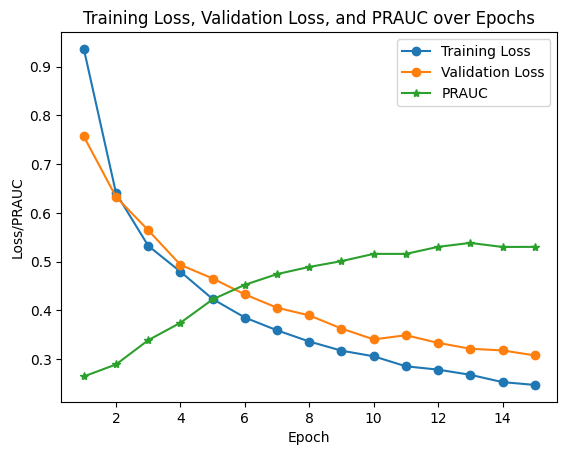

In [147]:
from pyhealth.trainer import Trainer

trainer = Trainer(model=model)
trainer.train(
    model_name="gnn",
    train_dataloader=train_loader,
    val_dataloader=val_loader,
    epochs=15,
    optimizer_params = {"lr": 2 * 1e-4},
    monitor="pr_auc_samples",
    monitor_criterion="max",
)

In [148]:
from pyhealth.metrics import multilabel_metrics_fn

y_true, y_prob, loss = trainer.inference(test_loader)
print(loss)

Evaluation: 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]

0.31444086347307476


In [149]:
y_true.shape

(203, 178)

In [150]:
y_prob.shape

(203, 178)

In [151]:
print(y_prob)
print(y_prob.shape)
print(y_prob.max())
print(y_prob.min())

[[2.3500267e-01 3.4867734e-01 8.6859804e-01 ... 8.6968809e-01
  8.5645515e-01 1.9081951e-03]
 [8.8784283e-01 1.4184238e-01 9.6287626e-01 ... 9.5698762e-01
  9.7242570e-01 2.4470294e-04]
 [2.7558339e-01 9.7169816e-01 9.9306035e-01 ... 9.7674918e-01
  9.6858549e-01 9.8419364e-04]
 ...
 [1.1793693e-02 9.8910540e-01 9.7117537e-01 ... 9.8395234e-01
  9.1295969e-01 8.6454871e-05]
 [3.8408273e-01 4.7442725e-01 8.5015845e-01 ... 9.3527043e-01
  8.5637462e-01 1.9703833e-02]
 [9.9554873e-01 1.0684070e-01 9.9745506e-01 ... 9.9934703e-01
  9.9720299e-01 1.3433122e-04]]
(203, 178)
0.9999993
9.053314e-11


In [152]:
print(y_true)
print(y_true.shape)

print(y_true[y_true == 0].shape)
print(y_true[y_true == 1].shape)



[[0. 0. 1. ... 0. 1. 0.]
 [0. 0. 1. ... 1. 1. 0.]
 [0. 0. 1. ... 0. 1. 0.]
 ...
 [0. 0. 1. ... 1. 1. 0.]
 [0. 0. 1. ... 1. 1. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
(203, 178)
(30902,)
(5232,)


In [153]:
# best risultati
# Relu with 256 hidden units -> circa 0.74 Acc - 0.70 F1 - 0.64 PRAUC (threshold 0.2-0.4)
# Relu with 512 hidden units -> circa 0.76 Acc - 0.72 F1 - 0.63 PRAUC (threshold 0.2-0.4)
# relu with 128 hidden units -> circa 0.76 Acc - 0.64 F1 - 0.63 PRAUC (threshold 0.4-0.5) - batch size 64

metrics = ["accuracy", "f1_samples", "pr_auc_samples", "jaccard_samples", "precision_samples", "recall_samples"]
multilabel_metrics_fn(y_true, y_prob, metrics=metrics, threshold=0.5)

{'accuracy': 0.7818951679858305,
 'f1_samples': 0.48443519781177796,
 'pr_auc_samples': 0.5046821220200183,
 'jaccard_samples': 0.3278049647608071,
 'precision_samples': 0.3827242814856147,
 'recall_samples': 0.7504442459190754}

## Baseline Models

Here we can use the models having the same input built in the previous cells. We tried GRASP, SafeDrug, Transformer, and so on. And evaluate them performance with several metrics.

### Transformer

**- Transformer without symptoms**

In [5]:
from pyhealth.models import Transformer

model = Transformer(
    dataset=mimic3sample,
    feature_keys=["conditions", "procedures"],
    label_key="drugs",
    mode="multilabel",
)

**- Transformer with symptoms**

In [16]:
from pyhealth.models import Transformer

model_symptoms = Transformer(
    dataset=mimic3sample,
    feature_keys=["conditions", "procedures", "symptoms"],
    label_key="drugs",
    mode="multilabel",
)

**- Training without symptoms**

In [6]:
from pyhealth.trainer import Trainer

trainer = Trainer(model=model)
trainer.train(
    model_name="transformer",
    train_dataloader=train_loader,
    val_dataloader=val_loader,
    epochs=5,
    optimizer_params = {"lr": 2 * 1e-4},
    monitor="pr_auc_samples",
)

Transformer(
  (embeddings): ModuleDict(
    (conditions): Embedding(2101, 128, padding_idx=0)
    (procedures): Embedding(735, 128, padding_idx=0)
  )
  (linear_layers): ModuleDict()
  (transformer): ModuleDict(
    (conditions): TransformerLayer(
      (transformer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadedAttention(
            (linear_layers): ModuleList(
              (0-2): 3 x Linear(in_features=128, out_features=128, bias=False)
            )
            (output_linear): Linear(in_features=128, out_features=128, bias=False)
            (attention): Attention()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (feed_forward): PositionwiseFeedForward(
            (w_1): Linear(in_features=128, out_features=512, bias=True)
            (w_2): Linear(in_features=512, out_features=128, bias=True)
            (dropout): Dropout(p=0.5, inplace=False)
            (activation): GELU(approximate='none')
          )
          (i

Epoch 0 / 5:   0%|          | 0/38 [00:00<?, ?it/s]

--- Train epoch-0, step-38 ---
loss: 1.0009


Evaluation: 100%|██████████| 13/13 [00:00<00:00, 64.71it/s]


--- Eval epoch-0, step-38 ---
pr_auc_samples: 0.2503
loss: 0.6405
New best pr_auc_samples score (0.2503) at epoch-0, step-38



Epoch 1 / 5:   0%|          | 0/38 [00:00<?, ?it/s]

--- Train epoch-1, step-76 ---
loss: 0.6743


Evaluation: 100%|██████████| 13/13 [00:00<00:00, 96.61it/s]


--- Eval epoch-1, step-76 ---
pr_auc_samples: 0.4571
loss: 0.4041
New best pr_auc_samples score (0.4571) at epoch-1, step-76



Epoch 2 / 5:   0%|          | 0/38 [00:00<?, ?it/s]

--- Train epoch-2, step-114 ---
loss: 0.4855


Evaluation: 100%|██████████| 13/13 [00:00<00:00, 109.89it/s]


--- Eval epoch-2, step-114 ---
pr_auc_samples: 0.5531
loss: 0.3572
New best pr_auc_samples score (0.5531) at epoch-2, step-114



Epoch 3 / 5:   0%|          | 0/38 [00:00<?, ?it/s]

--- Train epoch-3, step-152 ---
loss: 0.4314


Evaluation: 100%|██████████| 13/13 [00:00<00:00, 95.69it/s]


--- Eval epoch-3, step-152 ---
pr_auc_samples: 0.5662
loss: 0.3405
New best pr_auc_samples score (0.5662) at epoch-3, step-152



Epoch 4 / 5:   0%|          | 0/38 [00:00<?, ?it/s]

--- Train epoch-4, step-190 ---
loss: 0.4042


Evaluation: 100%|██████████| 13/13 [00:00<00:00, 105.36it/s]


--- Eval epoch-4, step-190 ---
pr_auc_samples: 0.5733
loss: 0.3298
New best pr_auc_samples score (0.5733) at epoch-4, step-190
Loaded best model


**- Training with symptoms**

Transformer(
  (embeddings): ModuleDict(
    (conditions): Embedding(2101, 128, padding_idx=0)
    (procedures): Embedding(735, 128, padding_idx=0)
    (symptoms): Embedding(716, 128, padding_idx=0)
  )
  (linear_layers): ModuleDict()
  (transformer): ModuleDict(
    (conditions): TransformerLayer(
      (transformer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadedAttention(
            (linear_layers): ModuleList(
              (0-2): 3 x Linear(in_features=128, out_features=128, bias=False)
            )
            (output_linear): Linear(in_features=128, out_features=128, bias=False)
            (attention): Attention()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (feed_forward): PositionwiseFeedForward(
            (w_1): Linear(in_features=128, out_features=512, bias=True)
            (w_2): Linear(in_features=512, out_features=128, bias=True)
            (dropout): Dropout(p=0.5, inplace=False)
            (activation)

Epoch 0 / 5:   0%|          | 0/13 [00:00<?, ?it/s]

--- Train epoch-0, step-13 ---
loss: 1.0995


Evaluation: 100%|██████████| 2/2 [00:00<00:00, 19.07it/s]

--- Eval epoch-0, step-13 ---
pr_auc_samples: 0.2179
loss: 0.7167
New best pr_auc_samples score (0.2179) at epoch-0, step-13



Epoch 1 / 5:   0%|          | 0/13 [00:00<?, ?it/s]

--- Train epoch-1, step-26 ---
loss: 0.8213


Evaluation: 100%|██████████| 2/2 [00:00<00:00, 19.12it/s]

--- Eval epoch-1, step-26 ---
pr_auc_samples: 0.3515


loss: 0.5101
New best pr_auc_samples score (0.3515) at epoch-1, step-26



Epoch 2 / 5:   0%|          | 0/13 [00:00<?, ?it/s]

--- Train epoch-2, step-39 ---
loss: 0.6230


Evaluation: 100%|██████████| 2/2 [00:00<00:00, 17.82it/s]

--- Eval epoch-2, step-39 ---
pr_auc_samples: 0.4867
loss: 0.3957
New best pr_auc_samples score (0.4867) at epoch-2, step-39



Epoch 3 / 5:   0%|          | 0/13 [00:00<?, ?it/s]

--- Train epoch-3, step-52 ---
loss: 0.5059


Evaluation: 100%|██████████| 2/2 [00:00<00:00, 16.67it/s]

--- Eval epoch-3, step-52 ---


pr_auc_samples: 0.5636
loss: 0.3635
New best pr_auc_samples score (0.5636) at epoch-3, step-52



Epoch 4 / 5:   0%|          | 0/13 [00:00<?, ?it/s]

--- Train epoch-4, step-65 ---
loss: 0.4648


Evaluation: 100%|██████████| 2/2 [00:00<00:00, 16.77it/s]


--- Eval epoch-4, step-65 ---
pr_auc_samples: 0.5891
loss: 0.3548
New best pr_auc_samples score (0.5891) at epoch-4, step-65
Loaded best model


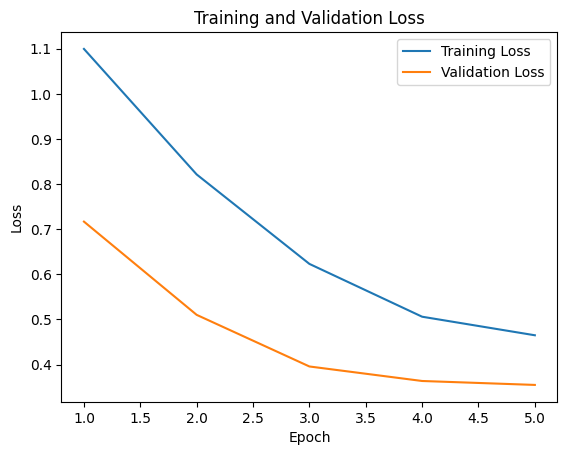

In [17]:
from pyhealth.trainer import Trainer

trainer_symptoms = Trainer(model=model_symptoms)
trainer_symptoms.train(
    model_name="transformer",
    train_dataloader=train_loader,
    val_dataloader=val_loader,
    epochs=5,
    optimizer_params = {"lr": 2 * 1e-4},
    monitor="pr_auc_samples",
)

**- Transformer Evaluation**

In [ ]:
### Without Symptoms - loss 0.3239 - time: 0m 6s
from pyhealth.metrics import multilabel_metrics_fn

y_true, y_prob, loss = trainer.inference(test_loader)
metrics = ["accuracy", "f1_samples", "pr_auc_samples", "jaccard_samples"]
multilabel_metrics_fn(y_true, y_prob, metrics=metrics)

In [8]:
y_true.shape

(405, 178)

In [18]:
### With Symptoms - loss 0.3192 - time: 0m 9s
from pyhealth.metrics import multilabel_metrics_fn

y_true_s, y_prob_s, loss_S = trainer_symptoms.inference(test_loader)
metrics = ["accuracy", "f1_samples", "pr_auc_samples", "jaccard_samples"]
multilabel_metrics_fn(y_true_s, y_prob_s, metrics=metrics)

Evaluation: 100%|██████████| 2/2 [00:00<00:00, 25.80it/s]


{'accuracy': 0.8848844604621582,
 'f1_samples': 0.48717984417073923,
 'pr_auc_samples': 0.56740182195282,
 'jaccard_samples': 0.32847741123274615}

In [19]:
y_true_s.shape

(212, 178)

### SafeDrug

**- SafeDrug without symptoms**

In [9]:
from pyhealth.models import SafeDrug

model = SafeDrug(
    dataset=mimic3sample
)

**- SafeDrug with symptoms**

In [23]:
from pyhealth.models import SafeDrug_Mod

model_symptoms = SafeDrug_Mod(
    dataset=mimic3sample
)

**- Training without symptoms**

In [10]:
from pyhealth.trainer import Trainer

trainer = Trainer(model=model)
trainer.train(
    model_name="safedrug",
    train_dataloader=train_loader,
    val_dataloader=val_loader,
    epochs=5,
    optimizer_params = {"lr": 2 * 1e-4},
    monitor="pr_auc_samples",
)

SafeDrug(
  (embeddings): ModuleDict(
    (conditions): Embedding(2101, 128, padding_idx=0)
    (procedures): Embedding(735, 128, padding_idx=0)
  )
  (cond_rnn): GRU(128, 128, batch_first=True)
  (proc_rnn): GRU(128, 128, batch_first=True)
  (query): Sequential(
    (0): ReLU()
    (1): Linear(in_features=256, out_features=128, bias=True)
  )
  (safedrug): SafeDrugLayer(
    (bipartite_transform): Linear(in_features=128, out_features=315, bias=True)
    (bipartite_output): Linear(in_features=315, out_features=178, bias=True)
    (mpnn): MolecularGraphNeuralNetwork(
      (embed_fingerprint): Embedding(226, 128)
      (W_fingerprint): ModuleList(
        (0-1): 2 x Linear(in_features=128, out_features=128, bias=True)
      )
    )
    (mpnn_output): Linear(in_features=178, out_features=178, bias=True)
    (mpnn_layernorm): LayerNorm((178,), eps=1e-05, elementwise_affine=True)
    (test): Linear(in_features=128, out_features=178, bias=True)
    (loss_fn): BCEWithLogitsLoss()
  )
)
Metri

Epoch 0 / 5:   0%|          | 0/38 [00:00<?, ?it/s]

--- Train epoch-0, step-38 ---
loss: 0.5502
ddi_loss: 0.1019


Evaluation: 100%|██████████| 13/13 [00:03<00:00,  3.32it/s]

--- Eval epoch-0, step-38 ---
pr_auc_samples: 0.4981
loss: 0.4226
New best pr_auc_samples score (0.4981) at epoch-0, step-38


Epoch 1 / 5:   0%|          | 0/38 [00:00<?, ?it/s]

--- Train epoch-1, step-76 ---
loss: 0.3415
ddi_loss: 0.0516


Evaluation: 100%|██████████| 13/13 [00:03<00:00,  3.48it/s]

--- Eval epoch-1, step-76 ---
pr_auc_samples: 0.6138
loss: 0.3050
New best pr_auc_samples score (0.6138) at epoch-1, step-76


Epoch 2 / 5:   0%|          | 0/38 [00:00<?, ?it/s]

--- Train epoch-2, step-114 ---
loss: 0.2843
ddi_loss: 0.0429


Evaluation: 100%|██████████| 13/13 [00:04<00:00,  3.24it/s]

--- Eval epoch-2, step-114 ---
pr_auc_samples: 0.6275
loss: 0.2770
New best pr_auc_samples score (0.6275) at epoch-2, step-114


Epoch 3 / 5:   0%|          | 0/38 [00:00<?, ?it/s]

--- Train epoch-3, step-152 ---
loss: 0.2694
ddi_loss: 0.0339


Evaluation: 100%|██████████| 13/13 [00:03<00:00,  3.77it/s]

--- Eval epoch-3, step-152 ---
pr_auc_samples: 0.6311
loss: 0.2726
New best pr_auc_samples score (0.6311) at epoch-3, step-152


Epoch 4 / 5:   0%|          | 0/38 [00:00<?, ?it/s]

--- Train epoch-4, step-190 ---
loss: 0.2607
ddi_loss: 0.0356


Evaluation: 100%|██████████| 13/13 [00:03<00:00,  3.87it/s]

--- Eval epoch-4, step-190 ---
pr_auc_samples: 0.6315
loss: 0.2722
New best pr_auc_samples score (0.6315) at epoch-4, step-190


Loaded best model


**- Training with symptoms**

In [ ]:
from pyhealth.trainer import Trainer

trainer_symptoms = Trainer(model=model_symptoms)
trainer_symptoms.train(
    model_name="safedrug",
    train_dataloader=train_loader,
    val_dataloader=val_loader,
    epochs=5,
    optimizer_params = {"lr": 2 * 1e-4},
    monitor="pr_auc_samples",
)

**- SafeDrug Evaluation**

In [11]:
### Without Symptoms - loss 0.2672 - time: 2m 6s
from pyhealth.metrics import multilabel_metrics_fn

y_true, y_prob, loss = trainer.inference(test_loader)
metrics = ["accuracy", "f1_samples", "pr_auc_samples", "jaccard_samples"]
multilabel_metrics_fn(y_true, y_prob, metrics=metrics)

Evaluation: 100%|██████████| 13/13 [00:03<00:00,  3.79it/s]


{'accuracy': 0.893424885559717,
 'f1_samples': 0.48484571222068096,
 'pr_auc_samples': 0.6387088524041594,
 'jaccard_samples': 0.32679935189451037}

In [12]:
y_true.shape

(405, 178)

In [25]:
### With Symptoms - loss 0.2666 - time: 2m 0s
from pyhealth.metrics import multilabel_metrics_fn

y_true, y_prob, loss = trainer_symptoms.inference(test_loader)
metrics = ["accuracy", "f1_samples", "pr_auc_samples", "jaccard_samples"]
multilabel_metrics_fn(y_true, y_prob, metrics=metrics)

Evaluation: 100%|██████████| 13/13 [00:03<00:00,  4.25it/s]


{'accuracy': 0.8965487514009023,
 'f1_samples': 0.4940201459077551,
 'pr_auc_samples': 0.6575319724664682,
 'jaccard_samples': 0.3343368918438221}

### GAMENet

### GRASP

### RETAIN

### GRAM

### KAME

### MoleRec

## Let'see some recommendation...

In [26]:
y_prob_round = np.round(y_prob, 0)

# Find the indices of the columns with values equal to 1 for each row
column_indices = [np.where(row == 1)[0] for row in y_prob_round]

indexes_prob=[]
# Print the column indices for each row
for i, indices in enumerate(column_indices):
    indexes_prob.append(indices)

In [27]:
# create empty lists to store the recommended drugs, patient ids, and visit ids
rec_drug = []
patient_ids = []
visit_ids = []

# get the list of all drugs in the dataset
list_drugs = mimic3sample.get_all_tokens('drugs')

# iterate over the top indexes for each sample in test_ds
for sample, top in zip(test_ds, indexes_prob):
    
    # append the patient id and visit id to their respective lists
    patient_ids.append(sample['patient_id'])
    visit_ids.append(sample['visit_id'])
    
    # create an empty list to store the recommended drugs for this sample
    sample_rec_drug = []
    
    # iterate over the top indexes for this sample
    for i in top:
        
        # append the drug at the i-th index to the recommended drugs list for this sample
        sample_rec_drug.append(list_drugs[i])
    
    # append the recommended drugs for this sample to the recommended drugs list
    rec_drug.append(sample_rec_drug)

# create a dataframe with the patient ids, visit ids, and recommended drugs
df_rec_drug = pd.DataFrame({'patient_id': patient_ids, 'visit_id': visit_ids, 'rec_drug': rec_drug})
df_rec_drug.to_csv('data/rec_drug.csv', index=False)

In [28]:
# Find the indices of the columns with values equal to 1 for each row
column_indices = [np.where(row == 1)[0] for row in y_true]

indexes=[]
# Print the column indices for each row
for i, indices in enumerate(column_indices):
    indexes.append(indices)

In [29]:
# create empty lists to store the recommended drugs, patient ids, and visit ids
true_drug = []
patient_ids = []
visit_ids = []


# get the list of all drugs in the dataset
list_drugs = mimic3sample.get_all_tokens('drugs')

# iterate over the top indexes for each sample in test_ds
for sample, top in zip(test_ds, indexes):
    
    # append the patient id and visit id to their respective lists
    patient_ids.append(sample['patient_id'])
    visit_ids.append(sample['visit_id'])
    
    # create an empty list to store the recommended drugs for this sample
    sample_true_drug = []
    
    # iterate over the top indexes for this sample
    for i in top:
        
        # append the drug at the i-th index to the recommended drugs list for this sample
        sample_true_drug.append(list_drugs[i])
    
    # append the recommended drugs for this sample to the recommended drugs list
    true_drug.append(sample_true_drug)

# create a dataframe with the patient ids, visit ids, and recommended drugs
df_true_drug = pd.DataFrame({'patient_id': patient_ids, 'visit_id': visit_ids, 'true_drug': true_drug})
df_true_drug.to_csv('data/true_drug.csv', index=False)

In [36]:
from pyhealth.medcode import InnerMap

# initialize an InnerMap
atc = InnerMap.load("ATC")

# select a patient from df_rec_drug
patient_id = 25111
visit_id = 147012
patient_df = df_rec_drug[df_rec_drug['patient_id'].astype(int)==patient_id]
patient_df = patient_df[patient_df['visit_id'].astype(int)==visit_id]

# iterate over the recommended drugs for the selected patient
for drugs in patient_df['rec_drug']:
    # lookup the ATC code for each drug and print it
    for drug in drugs:
        print(f"{drug}: {atc.lookup(drug)}")

A02B: DRUGS FOR PEPTIC ULCER AND GASTRO-OESOPHAGEAL REFLUX DISEASE (GORD)
A06A: DRUGS FOR CONSTIPATION
A12B: POTASSIUM SUPPLEMENTS
A12C: OTHER MINERAL SUPPLEMENTS in ATC
B01A: ANTITHROMBOTIC AGENTS
B05X: I.V. SOLUTION ADDITIVES
C03C: HIGH-CEILING DIURETICS
C07A: BETA BLOCKING AGENTS
N02A: OPIOID ANALGESICS
N02B: OTHER ANALGESICS AND ANTIPYRETICS in ATC
V04C: OTHER DIAGNOSTIC AGENTS in ATC
V06D: OTHER NUTRIENTS in ATC
